In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')
# import pandas,numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Upload the datasets
gs = pd.read_csv("goalscorers.csv")
rs = pd.read_csv("results.csv")
sh = pd.read_csv("shootouts.csv")

In [3]:
# lets see  the goa;sscorers datasets
gs.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [4]:
# explore the results dataset
rs.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
# explore the shootouts dataset
sh.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


*We see the dataset above. Where we see that there are some columns with same name. Now we check the details of these three datasets one by one*

In [6]:
# check the shape of the datasets
print("The Number of Rows and Columns of goalscorers dataset : ", gs.shape)
print("The Number of Rows and Columns of results dataset : ", rs.shape)
print("The Number of Rows and Columns of shootouts dataset : ", sh.shape)

The Number of Rows and Columns of goalscorers dataset :  (44110, 8)
The Number of Rows and Columns of results dataset :  (46442, 9)
The Number of Rows and Columns of shootouts dataset :  (605, 5)


In [7]:
# let's check the info of the goal scorers datasets
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44110 entries, 0 to 44109
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44110 non-null  object 
 1   home_team  44110 non-null  object 
 2   away_team  44110 non-null  object 
 3   team       44110 non-null  object 
 4   scorer     44060 non-null  object 
 5   minute     43847 non-null  float64
 6   own_goal   44108 non-null  object 
 7   penalty    44108 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


*Here we see that there are 8 columns and only one is numerical columns which is minute column and others are categorical columns*

In [8]:
# check the info of results dataset
rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46442 entries, 0 to 46441
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        46442 non-null  object
 1   home_team   46442 non-null  object
 2   away_team   46442 non-null  object
 3   home_score  46442 non-null  int64 
 4   away_score  46442 non-null  int64 
 5   tournament  46442 non-null  object
 6   city        46442 non-null  object
 7   country     46442 non-null  object
 8   neutral     46442 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB


*Here we see that there are 9 columns in result dataset. home_score and away__score column is numerical columns and neutral column is boolean column. Others are categorical column*

In [9]:
# check the info of shootouts dataset
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           605 non-null    object
 1   home_team      605 non-null    object
 2   away_team      605 non-null    object
 3   winner         605 non-null    object
 4   first_shooter  222 non-null    object
dtypes: object(5)
memory usage: 23.8+ KB


*In shootout dataset all 5 columns are categorical columns.*

## Explore the goalscorer dataset by Univariate and Multivariate analysis

In [10]:
gs.head(2)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False


In [11]:
#check the null values
gs.isnull().mean()*100

date         0.000000
home_team    0.000000
away_team    0.000000
team         0.000000
scorer       0.113353
minute       0.596237
own_goal     0.004534
penalty      0.004534
dtype: float64

*Here we see that there are 59% null values in minute column. But we will fill this when we analysis a perticular player's creer grpah*

In [12]:
# Get the top 10 scorers
top_scorers = gs['scorer'].value_counts().head(10)
top_scorers

scorer
Cristiano Ronaldo      111
Robert Lewandowski      62
Romelu Lukaku           61
Harry Kane              55
Lionel Messi            54
Edin Džeko              50
Ali Daei                49
Miroslav Klose          48
Aleksandar Mitrović     47
Carlos Ruiz             47
Name: count, dtype: int64

*Here we see the top ten higest goal scores. lets see this in a graph*

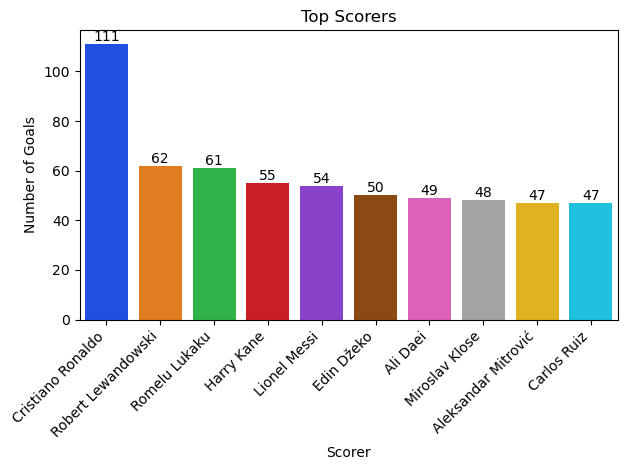

In [13]:
# Plot the graph using Seaborn
sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='bright')
plt.title('Top Scorers')
plt.xlabel('Scorer')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
# Annotate each bar with its count
for index, value in enumerate(top_scorers.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

*Cristiano Ronaldo has scored the highest number of goals for his country.*

##  

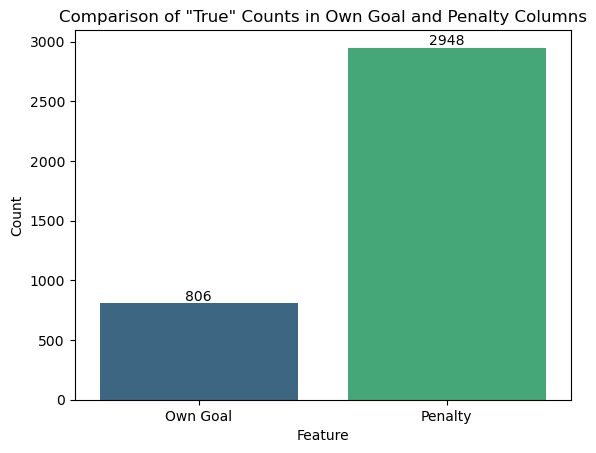

In [14]:
og = gs['own_goal'].value_counts()
p = gs['penalty'].value_counts()
# Extract the count of 'True' for both columns
own_goal_True_count = og.get(True)
penalty_True_count = p.get(True)

# Plot
sns.barplot(x=['Own Goal', 'Penalty'], y=[own_goal_True_count, penalty_True_count], palette='viridis')
plt.title('Comparison of "True" Counts in Own Goal and Penalty Columns')
plt.xlabel('Feature')
plt.ylabel('Count')

# Annotate bars with counts
for index, value in enumerate([own_goal_True_count, penalty_True_count]):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()


*The scorer has netted most of the goals through penalties rather than own goals.*

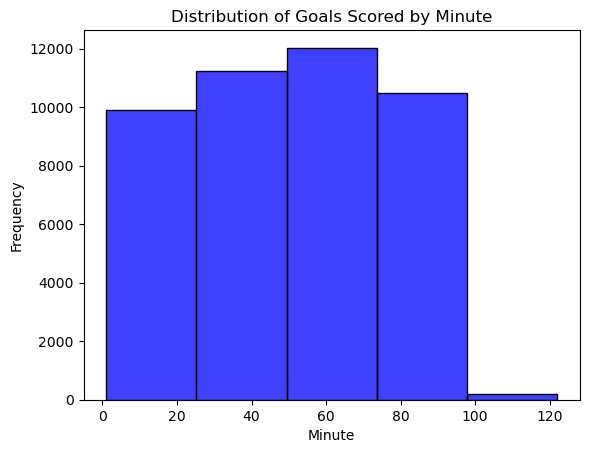

In [15]:
# Plot the distribution of goals scored by minute using Seaborn
sns.histplot(data= gs, x='minute', bins=5, kde=False, color = 'Blue')
plt.title('Distribution of Goals Scored by Minute')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.show()

*Most of the time, the scorer nets goals in the fourth quarter of the game, which is between the 50th and 60th minute.*

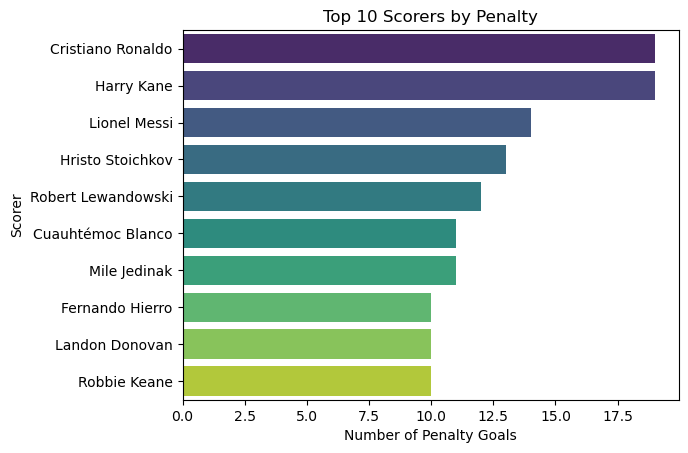

In [16]:
# Filter the dataset to include only rows where penalty is True
penalty_scorers = gs[gs['penalty'] == True]
# Group by scorer and count the number of occurrences
penalty_scorer_counts = penalty_scorers['scorer'].value_counts()
# Get the top 10 scorers
top_penalties = penalty_scorer_counts.head(10)
# Plot the graph
sns.barplot(x=top_penalties.values, y=top_penalties.index, palette='viridis')
plt.title('Top 10 Scorers by Penalty')
plt.xlabel('Number of Penalty Goals')
plt.ylabel('Scorer')
plt.show()

*Cristiano Ronaldo and Harry Kane often convert their goals through penalties.*

## Explore the result dataset and Do Univariate and Multivariate Analysis

In [17]:
rs.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [18]:
# check the null values in this dataset
rs.isnull().mean()*100

date          0.0
home_team     0.0
away_team     0.0
home_score    0.0
away_score    0.0
tournament    0.0
city          0.0
country       0.0
neutral       0.0
dtype: float64

*There is no null values in this dataset*

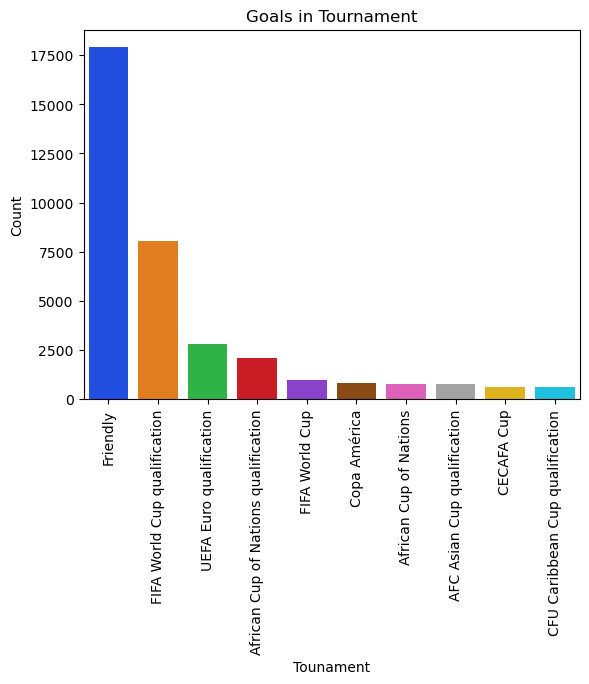

In [19]:
# Most Goals in Tournament
N =10
counts = rs['tournament'].value_counts()
top_values = counts.head(N)
sns.barplot(x=top_values.index, y=top_values.values,palette='bright')
plt.xticks(rotation=90)
plt.xlabel('Tounament')
plt.ylabel('Count')
plt.title('Goals in Tournament')
plt.show()

*Most of the Goals are scored in freindly matches*

## Explore the shootout data 

In [20]:
sh.head(2)

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN


In [21]:
# check the null values
sh.isnull().mean()*100

date              0.000000
home_team         0.000000
away_team         0.000000
winner            0.000000
first_shooter    63.305785
dtype: float64

*Here we see that first_shooter has 63% nll values. so we drop this column*

In [22]:
sh.drop(columns=['first_shooter'], inplace=True)


In [23]:
# lets see the value counts of winner
sh['winner'].value_counts()

winner
South Korea    15
Argentina      14
Zambia         13
Thailand       13
Egypt          13
               ..
Turkey          1
Sápmi           1
Menorca         1
Saint Lucia     1
Anguilla        1
Name: count, Length: 169, dtype: int64

*As this dataset has very less number of data. so can not find out any meaning full data from it*

## LETS JOIN THIS THREE DATASET AND TRY TO FIND OUT SOME INSIGHTS

In [24]:
# join the datasets
# Change the datatype of the 'date' column
gs['date'] =  pd.to_datetime(gs['date'])
rs['date'] = pd.to_datetime(rs['date'])
sh['date'] = pd.to_datetime(sh['date'])
# Assuming 'scorer', 'result', and 'shoot_out' are your DataFrames
# Merge the DataFrames
df = pd.merge(gs, rs, on=['date', 'home_team', 'away_team'], how='outer')
df = pd.merge(df, sh, on=['date', 'home_team', 'away_team'], how='outer')


In [25]:
df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN


In [26]:
# check the shape
print('Number of Rows and Columns', df.shape)

Number of Rows and Columns (76277, 15)


In [27]:
# let's explore the dataset and check if there is any duplicate column or not
# Check for duplicate columns
duplicate_columns = df.columns[df.columns.duplicated()]

# Print duplicate columns, if any
if len(duplicate_columns) > 0:
    print("Duplicate columns found:")
    print(duplicate_columns)
else:
    print("No duplicate columns found.")


No duplicate columns found.


## NOW WE CHOOSE A FOOTBALLER AND ANALYSIS HIS CAREERER GRAPH

In [28]:
 # Filter the DataFrame where the scorer name is "Cristiano Ronaldo"
cr = df[df['scorer'] == 'Cristiano Ronaldo']
cr.shape

(111, 15)

In [29]:
# check the null values
cr.isnull().mean()*100

date            0.0
home_team       0.0
away_team       0.0
team            0.0
scorer          0.0
minute          0.0
own_goal        0.0
penalty         0.0
home_score      0.0
away_score      0.0
tournament      0.0
city            0.0
country         0.0
neutral         0.0
winner        100.0
dtype: float64

In [30]:
# as winner column has 100%^ null values, we drop it
cr.drop(columns = ['winner'],inplace = True)

In [31]:
cr.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral
23814,2004-06-12,Portugal,Greece,Portugal,Cristiano Ronaldo,90.0,False,False,1.0,2.0,UEFA Euro,Porto,Portugal,False
24004,2004-06-30,Portugal,Netherlands,Portugal,Cristiano Ronaldo,26.0,False,False,2.0,1.0,UEFA Euro,Lisbon,Portugal,False
24286,2004-09-04,Latvia,Portugal,Portugal,Cristiano Ronaldo,57.0,False,False,0.0,2.0,FIFA World Cup qualification,Riga,Latvia,False
24461,2004-09-08,Portugal,Estonia,Portugal,Cristiano Ronaldo,75.0,False,False,4.0,0.0,FIFA World Cup qualification,Leiria,Portugal,False
24738,2004-10-13,Portugal,Russia,Portugal,Cristiano Ronaldo,39.0,False,False,7.0,1.0,FIFA World Cup qualification,Lisbon,Portugal,False


*As we know the scorer name is Cristiano Ronaldo and team name is Portugal so we drop this two column*

In [32]:
cr.drop(columns = ['scorer','team'], inplace = True)

In [33]:
cr['neutral'].value_counts()

neutral
False    93
True     18
Name: count, dtype: int64

*neutral column is define the venue. if it True it means the match is not played in no ones home ground.*

In [34]:
# Add new column 'venue' based on conditions
cr['venue'] = cr.apply(lambda x: 'home' if x['home_team'] == 'Portugal' and not x['neutral'] else ('away' if x['home_team'] != 'Portugal' and not x['neutral'] else 'others'), axis=1)


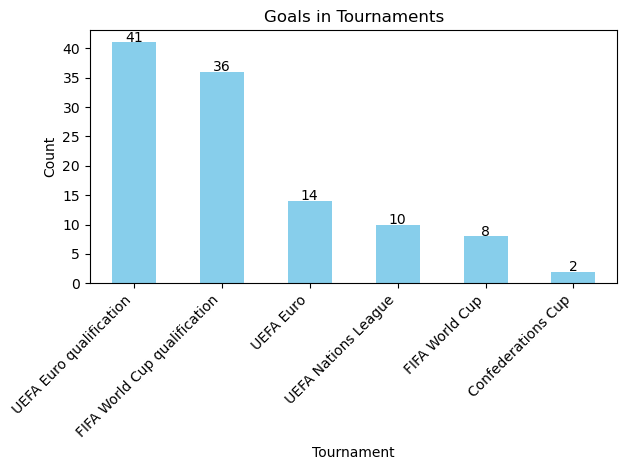

In [35]:
# Count the occurrences of each tournament
tournament_counts = cr['tournament'].value_counts()

# Plot the bar graph
tournament_counts.plot(kind='bar', color='skyblue')

# Add numbers on top of the bars
for i, count in enumerate(tournament_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

# Add labels and title
plt.xlabel('Tournament')
plt.ylabel('Count')
plt.title('Goals in Tournaments')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Cristiano Ronaldo scored 41 goals in the UEFA Euro Qualification round and 36 goals in the FIFA Qualification round. This means he scored the most goals in the UEFA Euro Qualification.*

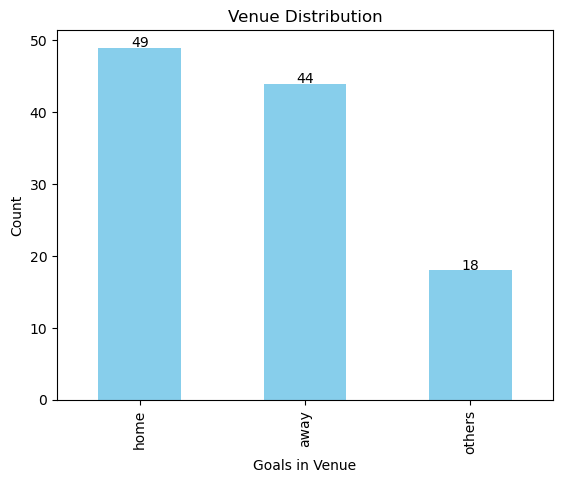

In [36]:
# Count the occurrences of each venue
venue_counts = cr['venue'].value_counts()

# Plot the bar graph
ax = venue_counts.plot(kind='bar', color='skyblue')

# Add numbers on top of the bars
for i, count in enumerate(venue_counts):
    ax.text(i, count + 0.1, str(count), ha='center')

# Add labels and title
plt.xlabel('Goals in Venue')
plt.ylabel('Count')
plt.title('Venue Distribution')

# Show the plot
plt.show()

*Cristiano Scored maximum number of Goals in Home Matches*

In [37]:
# Add a new column 'winner' based on conditions
cr['result'] = cr.apply(lambda x: 'win' if x['home_score'] > x['away_score'] else ('draw' if x['home_score'] == x['away_score'] else 'lose'), axis=1)
cr.head()

,date,home_team,away_team,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,venue,result
23814,2004-06-12,Portugal,Greece,90.0,False,False,1.0,2.0,UEFA Euro,Porto,Portugal,False,home,lose
24004,2004-06-30,Portugal,Netherlands,26.0,False,False,2.0,1.0,UEFA Euro,Lisbon,Portugal,False,home,win
24286,2004-09-04,Latvia,Portugal,57.0,False,False,0.0,2.0,FIFA World Cup qualification,Riga,Latvia,False,away,lose
24461,2004-09-08,Portugal,Estonia,75.0,False,False,4.0,0.0,FIFA World Cup qualification,Leiria,Portugal,False,home,win
24738,2004-10-13,Portugal,Russia,39.0,False,False,7.0,1.0,FIFA World Cup qualification,Lisbon,Portugal,False,home,win


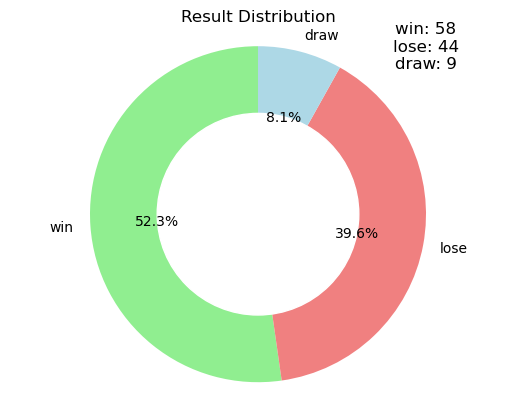

In [38]:
import matplotlib.pyplot as plt

# Count the occurrences of each result
result_counts = cr['result'].value_counts()

# Create the donut chart
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightblue'])

# Add numbers in the top right
plt.text(1,1, f'win: {result_counts["win"]}\nlose: {result_counts["lose"]}\ndraw: {result_counts["draw"]}', verticalalignment='center', horizontalalignment='center', fontsize=12)

# Add a circle in the middle to create a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add title
plt.title('Result Distribution')

# Show the plot
plt.show()


*Winning percentage of Portugal (in which Cristiano Ronaldo Played) is 52.3%*

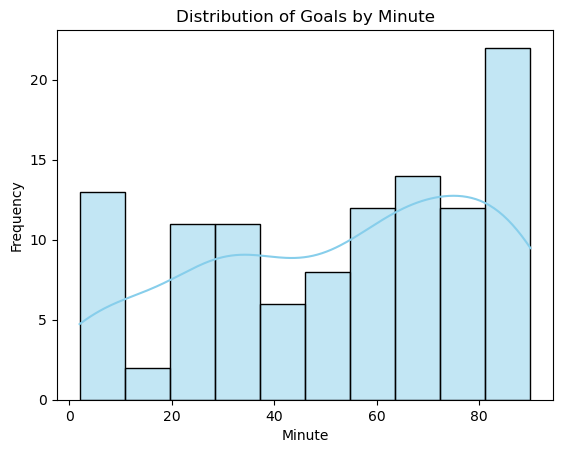

In [39]:
# plot a graph of time of goal scoring
# Create a histogram plot of the 'minute' column
sns.histplot(data=cr, x='minute', bins=10, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.title('Distribution of Goals by Minute')

# Show the plot
plt.show()

*Cristiano scored more than 20 goals out of 111 after the 80th minute. Interestingly, he scored more than 10 goals out of 111 at the very beginning.*

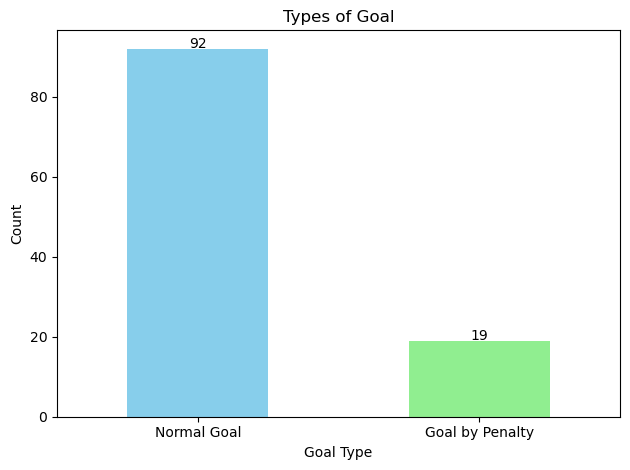

In [40]:
# Map penalty values to goal types
cr['goal_type'] = cr['penalty'].map({True: 'Goal by Penalty', False: 'Normal Goal'})
# Count the occurrences of each goal type
goal_counts = cr['goal_type'].value_counts()
# Plot the bar graph
goal_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
# Add numbers on top of the bars
for i, count in enumerate(goal_counts):
    plt.text(i, count + 0.1, str(count), ha='center')
# Add labels and title
plt.xlabel('Goal Type')
plt.ylabel('Count')
plt.title('Types of Goal')
# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


*Cristiano Scored goals by penalty 19 times*

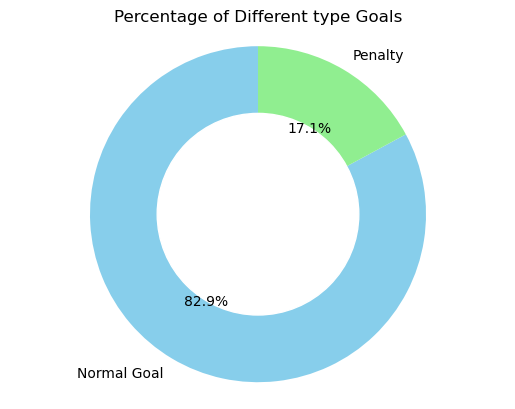

In [41]:
# Define a function to map penalty values to goal types
def map_goal_type(value):
    if value == True:
        return 'Penalty'
    else:
        return 'Normal Goal'

# Create a new column 'goal_type' based on the penalty values
cr['goal_type'] = cr['penalty'].apply(map_goal_type)

# Count the occurrences of each goal type
goal_type_counts = cr['goal_type'].value_counts()

# Plot the donut chart
plt.pie(goal_type_counts, labels=goal_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])

# Add a circle in the middle to create a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))

# Add title
plt.title('Percentage of Different type Goals')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


*The rate of goal conversion by penalty is 17.1% which is very minimal. Otherwise his normal goal conversion rate is 82.9%*

In [42]:
# value_count of Own_goal
cr["own_goal"].value_counts()

own_goal
False    111
Name: count, dtype: int64

The own_goal consist only false value. So we will drop this column

In [43]:
cr.drop(columns = ['own_goal'],inplace = True)

In [44]:
# Create a new column 'opponent' based on the condition
cr['opponent'] = cr.apply(lambda x: x['away_team'] if x['home_team'] == 'Portugal' else x['home_team'], axis=1)

In [45]:
cr.head()

,date,home_team,away_team,minute,penalty,home_score,away_score,tournament,city,country,neutral,venue,result,goal_type,opponent
23814,2004-06-12,Portugal,Greece,90.0,False,1.0,2.0,UEFA Euro,Porto,Portugal,False,home,lose,Normal Goal,Greece
24004,2004-06-30,Portugal,Netherlands,26.0,False,2.0,1.0,UEFA Euro,Lisbon,Portugal,False,home,win,Normal Goal,Netherlands
24286,2004-09-04,Latvia,Portugal,57.0,False,0.0,2.0,FIFA World Cup qualification,Riga,Latvia,False,away,lose,Normal Goal,Latvia
24461,2004-09-08,Portugal,Estonia,75.0,False,4.0,0.0,FIFA World Cup qualification,Leiria,Portugal,False,home,win,Normal Goal,Estonia
24738,2004-10-13,Portugal,Russia,39.0,False,7.0,1.0,FIFA World Cup qualification,Lisbon,Portugal,False,home,win,Normal Goal,Russia


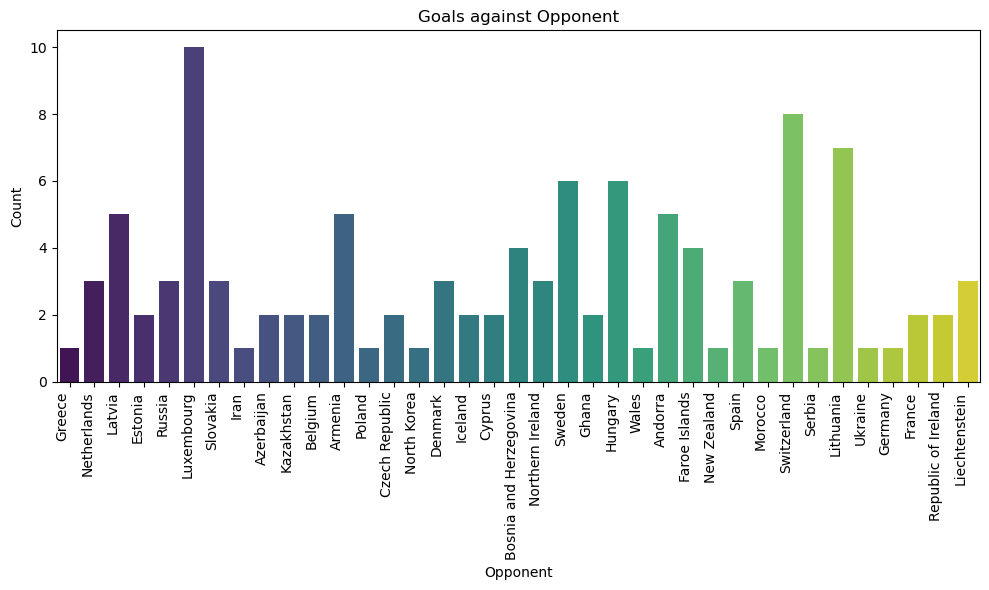

In [46]:
# Plot the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=cr, x='opponent', palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('Opponent')
plt.ylabel('Count')
plt.title('Goals against Opponent')

# Show the plot
plt.tight_layout()
plt.show()


*Cristiano Scored Maximum Number of Goals agianst
1.Luxembourg 2.Switzerland 3. Lithuania*

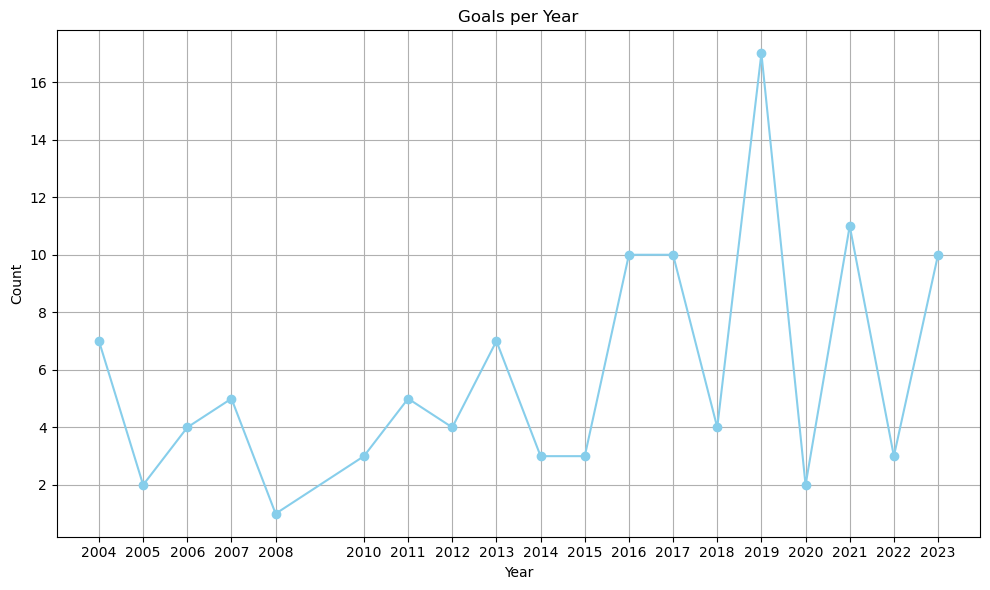

In [47]:
# Convert 'date' column to datetime format
cr['date'] = pd.to_datetime(cr['date'])

# Extract year from 'date' column
cr['year'] = cr['date'].dt.year

# Count the occurrences of each year
year_counts = cr['year'].value_counts().sort_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', color='skyblue', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Goals per Year')

# Show the plot
plt.grid(True)
plt.xticks(year_counts.index)
plt.tight_layout()
plt.show()


*This dataset contain the data of 19 years .
Cristiano scored maximum goals in the year 2019 for his country.
He scored minimum Number of goals in the year 2008*

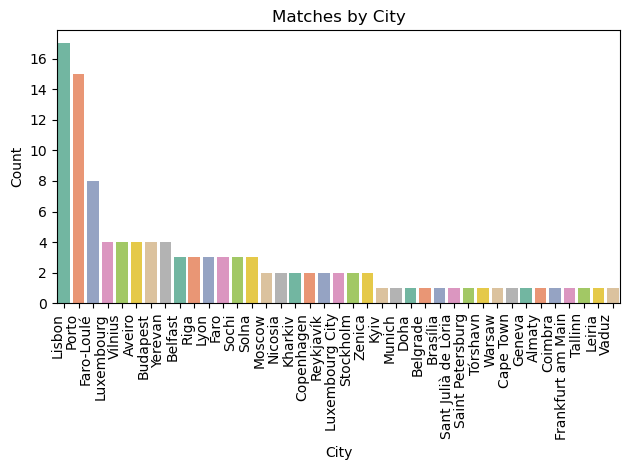

In [48]:
# Plot the count plot for cities
sns.countplot(data=cr, x='city', palette='Set2', order=cr['city'].value_counts().index)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Matches by City')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


* Cristiano Scored maximum number of goals in Lisbon and Porto city.*

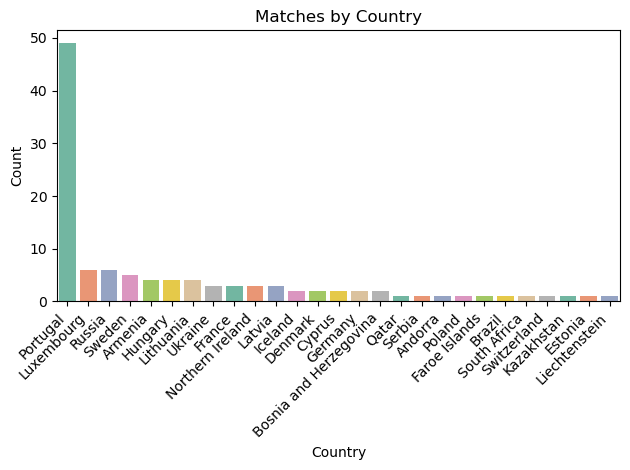

In [49]:
# Plot the count plot for countries
sns.countplot(data=cr, x='country', palette='Set2', order=cr['country'].value_counts().index)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Matches by Country')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


*Cristiano Scored more than 50 Goals in his own Country Portugal*

In [50]:
# Create a new column 'game_time' based on the minute values
def categorize_game_time(minute):
    if minute <= 15:
        return '1st Quarter'
    elif minute <= 30:
        return '2nd Quarter'
    elif minute <= 45:
        return '3rd Quarter'
    elif minute <= 60:
        return '4th Quarter'
    elif minute <= 75:
        return '5th Quarter'
    elif minute <= 90:
        return '6th Quarter'
    else:
        return 'Extra Time'

cr['game_time'] = cr['minute'].apply(categorize_game_time)

# Display the DataFrame to verify the changes
cr.head()

,date,home_team,away_team,minute,penalty,home_score,away_score,tournament,city,country,neutral,venue,result,goal_type,opponent,year,game_time
23814,2004-06-12,Portugal,Greece,90.0,False,1.0,2.0,UEFA Euro,Porto,Portugal,False,home,lose,Normal Goal,Greece,2004,6th Quarter
24004,2004-06-30,Portugal,Netherlands,26.0,False,2.0,1.0,UEFA Euro,Lisbon,Portugal,False,home,win,Normal Goal,Netherlands,2004,2nd Quarter
24286,2004-09-04,Latvia,Portugal,57.0,False,0.0,2.0,FIFA World Cup qualification,Riga,Latvia,False,away,lose,Normal Goal,Latvia,2004,4th Quarter
24461,2004-09-08,Portugal,Estonia,75.0,False,4.0,0.0,FIFA World Cup qualification,Leiria,Portugal,False,home,win,Normal Goal,Estonia,2004,5th Quarter
24738,2004-10-13,Portugal,Russia,39.0,False,7.0,1.0,FIFA World Cup qualification,Lisbon,Portugal,False,home,win,Normal Goal,Russia,2004,3rd Quarter


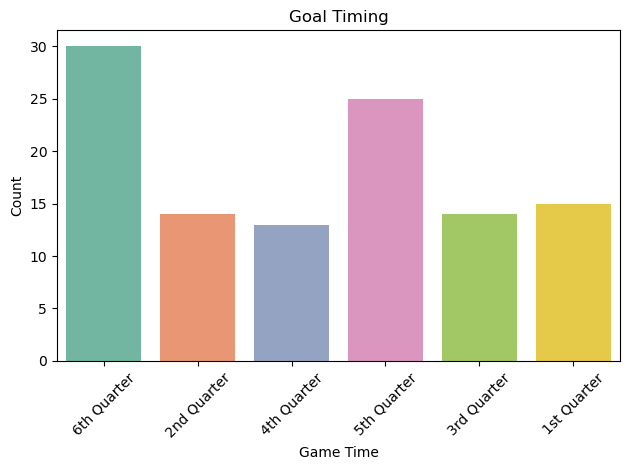

In [51]:
# Plot the count plot
sns.countplot(data=cr, x='game_time', palette='Set2')

# Add labels and title
plt.xlabel('Game Time')
plt.ylabel('Count')
plt.title('Goal Timing')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*Cristiano Scored maximum goals in 6th and 5th Quarter of the game*

## MULTIVARIATE ANALYSIS

In [52]:
cr.head(2)

,date,home_team,away_team,minute,penalty,home_score,away_score,tournament,city,country,neutral,venue,result,goal_type,opponent,year,game_time
23814,2004-06-12,Portugal,Greece,90.0,False,1.0,2.0,UEFA Euro,Porto,Portugal,False,home,lose,Normal Goal,Greece,2004,6th Quarter
24004,2004-06-30,Portugal,Netherlands,26.0,False,2.0,1.0,UEFA Euro,Lisbon,Portugal,False,home,win,Normal Goal,Netherlands,2004,2nd Quarter


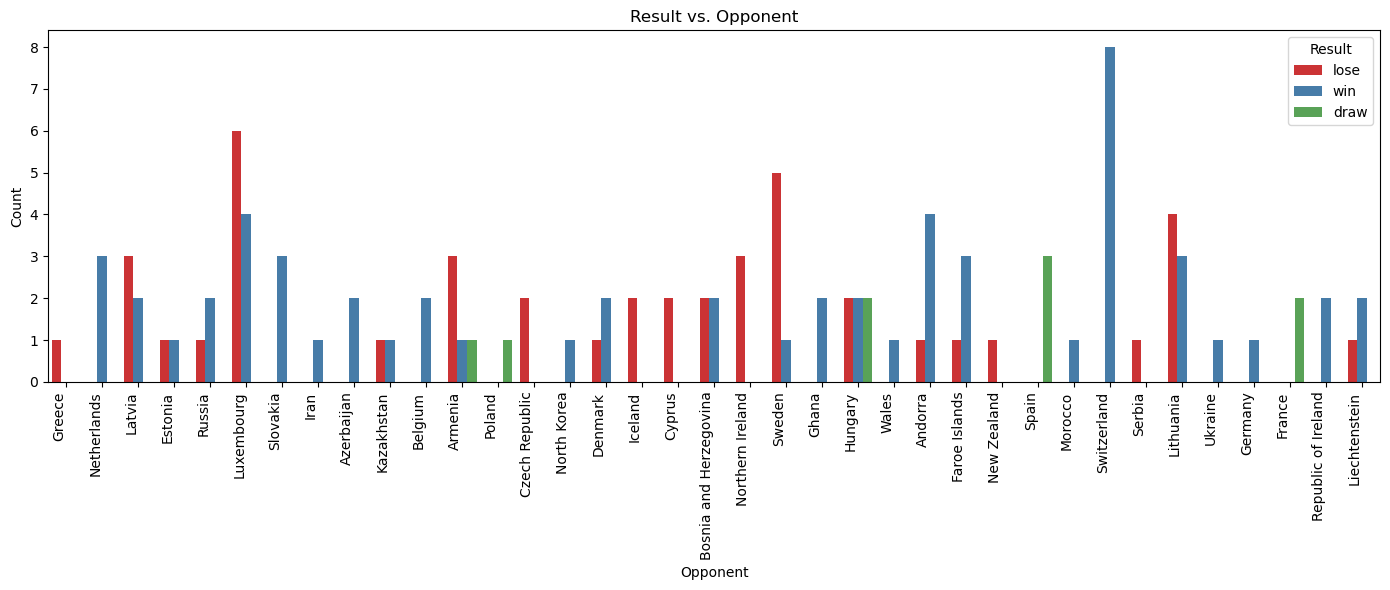

In [53]:
# Plot the count plot
plt.figure(figsize=(14, 6))
sns.countplot(data=cr, x='opponent', hue='result', palette='Set1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('Opponent')
plt.ylabel('Count')
plt.title('Result vs. Opponent')

# Show the plot
plt.tight_layout()
plt.legend(title='Result')
plt.show()


* *Portugal wins the most when Cristiano scores against Switzerland.*
* *Portugal loses against Luxembourg most of the time, but Cristiano still scores.*
* *Against Greece, Czech Republic, Iceland, Cyprus, Northern Ireland, and Serbia, Portugal never wins a match, but Cristiano scores goals.*
* *Against Netherlands, Slovakia, Iran, Azerbaijan, Belgium, North Korea, Ghana, Wales, Morocco, Switzerland, Ukraine, Germany, Republic of Ireland, Portugal never loses a match, and Cristiano scores.*
* *Against Poland, Spain, and France, all matches end in a draw.*

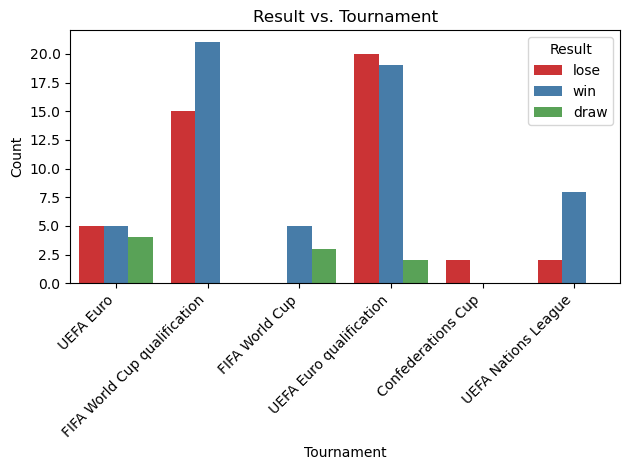

In [54]:
# Plot the count plot
sns.countplot(data=cr, x='tournament', hue='result', palette='Set1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Tournament')
plt.ylabel('Count')
plt.title('Result vs. Tournament')

# Show the plot
plt.tight_layout()
plt.legend(title='Result')
plt.show()


* *Here we see that Portugal loses the maximum matches in UEFA Euro qualification, but Cristiano scores goals.*
* *Portugal wins the maximum number of matches in FIFA World Cup qualification, and Cristiano scores.*
* *The winning percentage is also high in the UEFA Nations League.*

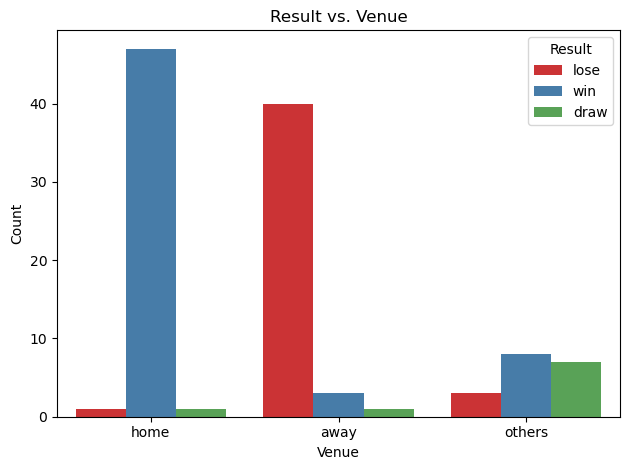

In [55]:
# Plot the count plot
sns.countplot(data=cr, x='venue', hue='result', palette='Set1')

# Add labels and title
plt.xlabel('Venue')
plt.ylabel('Count')
plt.title('Result vs. Venue')

# Show the plot
plt.tight_layout()
plt.legend(title='Result')
plt.show()


* *The number of wins is very high in home matches rather than away matches.*
* *Interestingly, when Portugal played in neutral venues (not at home or away), the number of draws and wins is almost the same.*

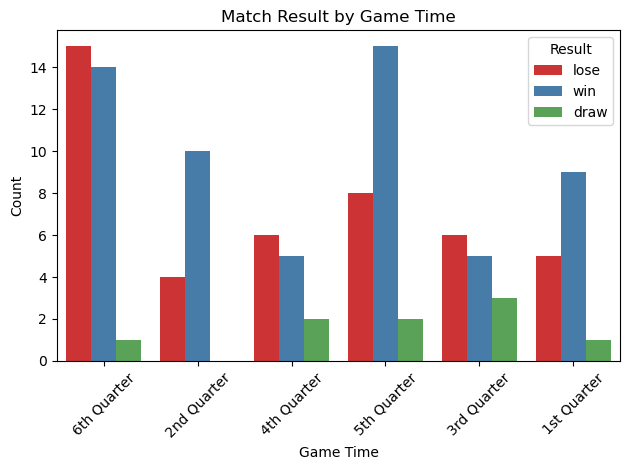

In [56]:
# Plot the count plot
sns.countplot(data=cr, x='game_time', hue='result', palette='Set1')

# Add labels and title
plt.xlabel('Game Time')
plt.ylabel('Count')
plt.title('Match Result by Game Time')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Result', loc='upper right')
plt.tight_layout()
plt.show()


* *When Cristiano scored goals in the 6th quarter, Portugal lost the match the most number of times.*
* *When Cristiano scored goals in the 5th quarter, Portugal won the game the most number of times.*

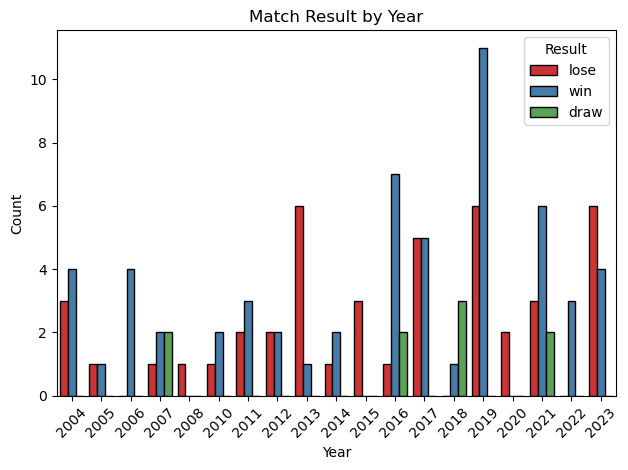

In [57]:
# Plot the stacked bar chart
sns.countplot(data=cr, x='year', hue='result', palette='Set1', edgecolor='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Match Result by Year')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Result', loc='upper right')
plt.tight_layout()
plt.show()


* *2019 was a golden period for Cristiano. In this year, he scored goals, and Portugal won the game the most number of times.*
* *2013 and 2023 were not good years for him. The losing percentage was high in these years.*
* *In 2006 and 2022, Portugal did not lose any match.*
* *However, in 2008, 2015, and 2020, Portugal did not win a m
  h.*